In [10]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact
plt.style.use("ggplot")

In [3]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def hard_sigmoid(x):
    return min(1, max(0, x))

def hard_concrete(loc, temp, gamma, zeta):
    u = np.random.random()
    s = sigmoid((np.log(u) - np.log(1 - u) + loc) / temp)
    s = s * (zeta - gamma) + gamma
    return hard_sigmoid(s)

In [4]:
def plot_hard_concreate(loc, temp, gamma, zeta, num=10_000, bins=100, **kwargs):
    plt.hist([hard_concrete(loc, temp, gamma, zeta) for _ in range(num)], bins=bins, density=True, **kwargs)

In [5]:
def interactive_hard_concrete(loc, temp):
    plot_hard_concreate(loc, temp, gamma=-0.1, zeta=1.1)

interact(interactive_hard_concrete, loc=(-0.5, 0.5), temp=(0.01, 1));

interactive(children=(FloatSlider(value=0.0, description='loc', max=0.5, min=-0.5), FloatSlider(value=0.505, d…

In [3]:
import torch
import seaborn
checkpoint = "/brtx/606-nvme1/haoranxu/moa_checkpoints/en2xxl0_4_1_normadapter_temp_2_m4_1_s_1024_1024/checkpoint_best-shard0.pt"
checkpoint = torch.load(checkpoint)['model'] #["encoder.layers.4.moa_wrapper.adapter.up_loga"]
# print(checkpoint.keys())

<ipython-input-123-ec6fb57138d7>:7: UserWarning: torch.range is deprecated and will be removed in a future release because its behavior is inconsistent with Python's range builtin. Instead, use torch.arange, which produces values in [start, end).
  u = torch.range(0.3, 0.6, 0.01)
<ipython-input-123-ec6fb57138d7>:8: UserWarning: torch.range is deprecated and will be removed in a future release because its behavior is inconsistent with Python's range builtin. Instead, use torch.arange, which produces values in [start, end).
  a = torch.range(0, checkpoint.shape[-1]/64-1, 1)
<ipython-input-123-ec6fb57138d7>:16: UserWarning: torch.range is deprecated and will be removed in a future release because its behavior is inconsistent with Python's range builtin. Instead, use torch.arange, which produces values in [start, end).
  u = torch.range(0.3 ,0.6, 0.01)
<ipython-input-123-ec6fb57138d7>:17: UserWarning: torch.range is deprecated and will be removed in a future release because its behavior is

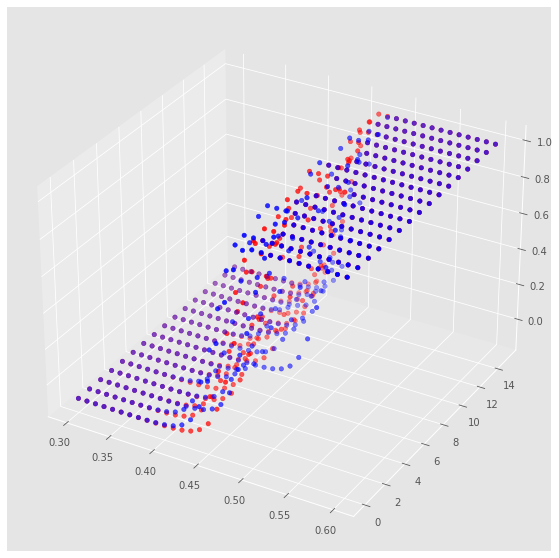

In [123]:
def hard_concrete(u, a, temp=0.05, gamma=-0.1, zeta=1.1):
    u = torch.tensor(u)
    s = torch.sigmoid((torch.log(u) - torch.log(1 - u) + checkpoint[a, ::16].float().view(-1,1)) / temp)
    s = s * (zeta - gamma) + gamma
    return torch.nn.functional.hardtanh(s)

u = torch.range(0.3, 0.6, 0.01)
a = torch.range(0, checkpoint.shape[-1]/16-1, 1)
U, A = np.meshgrid(u,a)
s = hard_concrete(U, 0)

plt.figure (figsize = (12, 10))
axes = plt.axes(projection='3d')
axes.scatter3D(U, A, s, color="r")

u = torch.range(0.3 ,0.6, 0.01)
a = torch.range(0, checkpoint.shape[-1]/16-1, 1)
U, A = np.meshgrid(u,a)
s = hard_concrete(U, 1)

# axes = plt.axes(projection='3d')
axes.scatter3D(U, A, s, color="b")




<ipython-input-104-2deff5d68e53>:7: UserWarning: torch.range is deprecated and will be removed in a future release because its behavior is inconsistent with Python's range builtin. Instead, use torch.arange, which produces values in [start, end).
  u = torch.range(0.1 ,0.9, 0.01)
<ipython-input-104-2deff5d68e53>:8: UserWarning: torch.range is deprecated and will be removed in a future release because its behavior is inconsistent with Python's range builtin. Instead, use torch.arange, which produces values in [start, end).
  a = torch.range(0, checkpoint.shape[-1]/4-1, 1)


torch.Size([81]) torch.Size([256]) torch.Size([256, 81])


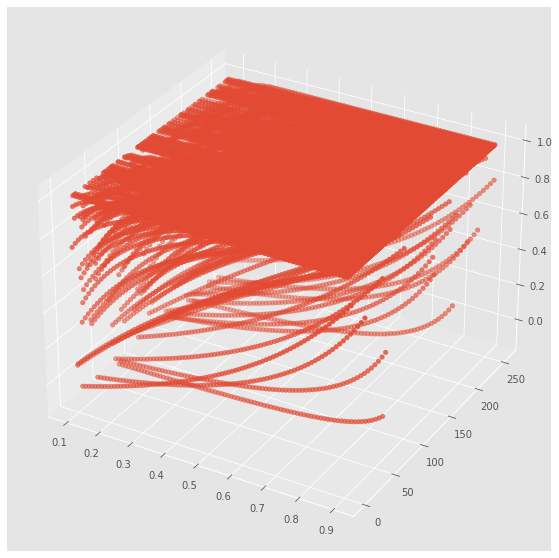

<Figure size 432x288 with 0 Axes>

In [104]:
def hard_concrete(u, a, temp=0.05, gamma=-0.1, zeta=1.1):
    u = torch.tensor(u)
    s = torch.sigmoid((torch.log(u) - torch.log(1 - u) + checkpoint[1, ::4].float().view(-1,1) / temp))
    s = s * (zeta - gamma) + gamma
    return torch.nn.functional.hardtanh(s)

u = torch.range(0.1 ,0.9, 0.01)
a = torch.range(0, checkpoint.shape[-1]/4-1, 1)
U, A = np.meshgrid(u,a)
s = hard_concrete(U, a)

plt.figure (figsize = (12, 10))
axes = plt.axes(projection='3d')
print(u.shape, a.shape, s.shape)
axes.scatter3D(U, A, s)
plt.show()
plt.clf()



<ipython-input-103-78ec290f392b>:7: UserWarning: torch.range is deprecated and will be removed in a future release because its behavior is inconsistent with Python's range builtin. Instead, use torch.arange, which produces values in [start, end).
  u = torch.range(0.1 ,0.5, 0.01)
<ipython-input-103-78ec290f392b>:8: UserWarning: torch.range is deprecated and will be removed in a future release because its behavior is inconsistent with Python's range builtin. Instead, use torch.arange, which produces values in [start, end).
  a = torch.range(0, checkpoint.shape[-1]/4-1, 1)


torch.Size([41]) torch.Size([256]) torch.Size([256, 41])


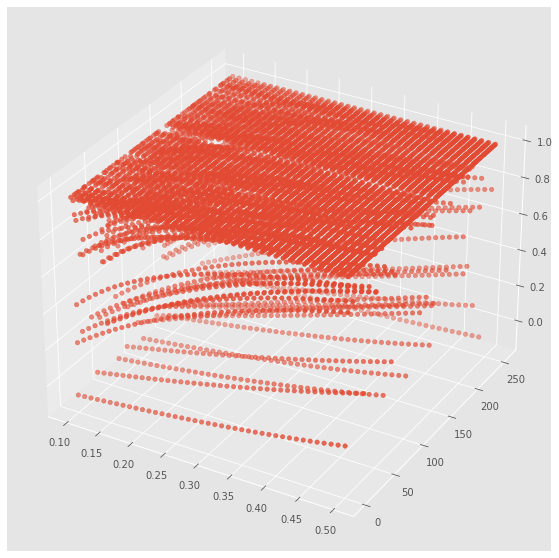

<Figure size 432x288 with 0 Axes>

In [103]:
def hard_concrete(u, a, temp=0.05, gamma=-0.1, zeta=1.1):
    u = torch.tensor(u)
    s = torch.sigmoid((torch.log(u) - torch.log(1 - u) + checkpoint[2, ::4].float().view(-1,1) / temp))
    s = s * (zeta - gamma) + gamma
    return torch.nn.functional.hardtanh(s)

u = torch.range(0.1 ,0.5, 0.01)
a = torch.range(0, checkpoint.shape[-1]/4-1, 1)
U, A = np.meshgrid(u,a)
s = hard_concrete(U, a)

plt.figure (figsize = (12, 10))
axes = plt.axes(projection='3d')
print(u.shape, a.shape, s.shape)
axes.scatter3D(U, A, s)
plt.show()
plt.clf()

<ipython-input-101-e26a842b8b95>:7: UserWarning: torch.range is deprecated and will be removed in a future release because its behavior is inconsistent with Python's range builtin. Instead, use torch.arange, which produces values in [start, end).
  u = torch.range(0.1,0.9, 0.1)
<ipython-input-101-e26a842b8b95>:8: UserWarning: torch.range is deprecated and will be removed in a future release because its behavior is inconsistent with Python's range builtin. Instead, use torch.arange, which produces values in [start, end).
  a = torch.range(0, checkpoint.shape[-1]-1, 1)


torch.Size([9]) torch.Size([1024]) torch.Size([1024, 9])


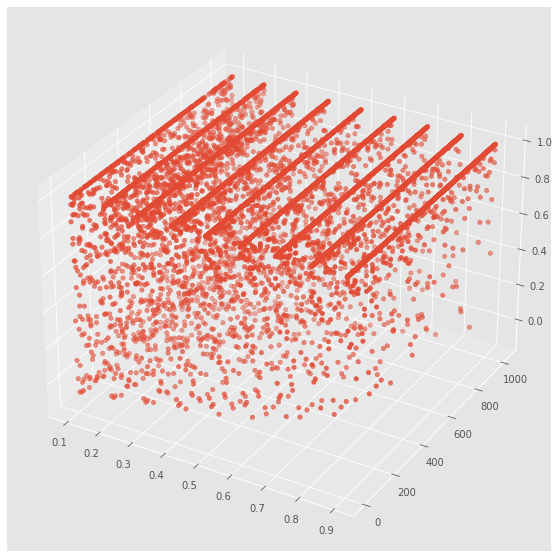

<Figure size 432x288 with 0 Axes>

In [101]:
def hard_concrete(u, a, temp=0.05, gamma=-0.1, zeta=1.1):
    u = torch.tensor(u)
    s = torch.sigmoid((torch.log(u) - torch.log(1 - u) + checkpoint[3, :].float().view(-1,1) / temp))
    s = s * (zeta - gamma) + gamma
    return torch.nn.functional.hardtanh(s)

u = torch.range(0.1,0.9, 0.1)
a = torch.range(0, checkpoint.shape[-1]-1, 1)
U, A = np.meshgrid(u,a)
s = hard_concrete(U, a)

plt.figure (figsize = (12, 10))
axes = plt.axes(projection='3d')
print(u.shape, a.shape, s.shape)
axes.scatter3D(U, A, s)
plt.show()
plt.clf()

In [85]:
torch.range(0,1, 0.1)

<ipython-input-85-a20388a5ee30>:1: UserWarning: torch.range is deprecated and will be removed in a future release because its behavior is inconsistent with Python's range builtin. Instead, use torch.arange, which produces values in [start, end).
  torch.range(0,1, 0.1)


tensor([0.0000, 0.1000, 0.2000, 0.3000, 0.4000, 0.5000, 0.6000, 0.7000, 0.8000,
        0.9000, 1.0000])

torch.Size([1024, 1001])
torch.Size([1, 1001]) torch.Size([1024]) torch.Size([1024, 1001])


<ipython-input-91-26444f4a8db2>:7: UserWarning: torch.range is deprecated and will be removed in a future release because its behavior is inconsistent with Python's range builtin. Instead, use torch.arange, which produces values in [start, end).
  u = torch.range(0,1, 0.001).view(1, -1)
<ipython-input-91-26444f4a8db2>:8: UserWarning: torch.range is deprecated and will be removed in a future release because its behavior is inconsistent with Python's range builtin. Instead, use torch.arange, which produces values in [start, end).
  a = torch.range(0, checkpoint.shape[-1]-1, 1)
<ipython-input-91-26444f4a8db2>:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  u = torch.tensor(u)


ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (1024, 81) and arg 2 with shape (1024, 1001).

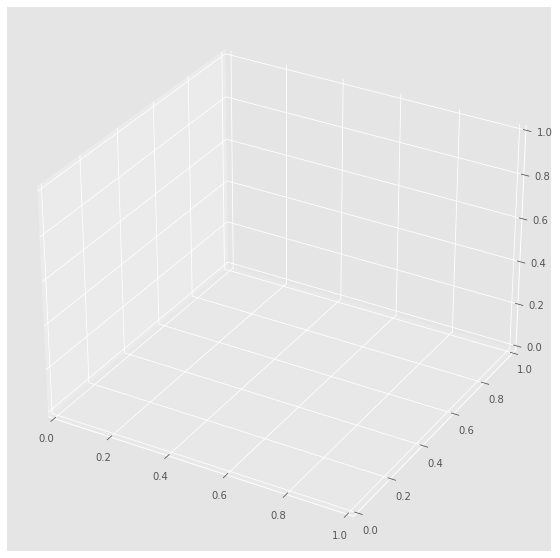

In [91]:
def hard_concrete(u, a, temp=0.05, gamma=-0.1, zeta=1.1):
    u = torch.tensor(u)
    s = torch.sigmoid((torch.log(u) - torch.log(1 - u) + checkpoint[0, :].float().view(-1,1) / temp))
    s = s * (zeta - gamma) + gamma
    return torch.nn.functional.hardtanh(s)

u = torch.range(0,1, 0.001).view(1, -1)
a = torch.range(0, checkpoint.shape[-1]-1, 1)
s = hard_concrete(u, a)
points = 


plt.figure (figsize = (12, 10))
axes = plt.axes(projection='3d')
print(u.shape, a.shape, s.shape)
axes.plot_surface(U, A, s)
plt.show()
plt.clf()

torch.Size([8]) torch.Size([])


<ipython-input-87-b36849269fe2>:17: UserWarning: torch.range is deprecated and will be removed in a future release because its behavior is inconsistent with Python's range builtin. Instead, use torch.arange, which produces values in [start, end).
  u = torch.range(0, 1, 0.001)
<ipython-input-87-b36849269fe2>:18: UserWarning: torch.range is deprecated and will be removed in a future release because its behavior is inconsistent with Python's range builtin. Instead, use torch.arange, which produces values in [start, end).
  a = torch.range(0, lr_ar.shape[0] - 1, 1)
<ipython-input-87-b36849269fe2>:26: UserWarning: torch.range is deprecated and will be removed in a future release because its behavior is inconsistent with Python's range builtin. Instead, use torch.arange, which produces values in [start, end).
  u = torch.range(0, 1, 0.01)
<ipython-input-87-b36849269fe2>:27: UserWarning: torch.range is deprecated and will be removed in a future release because its behavior is inconsistent wi

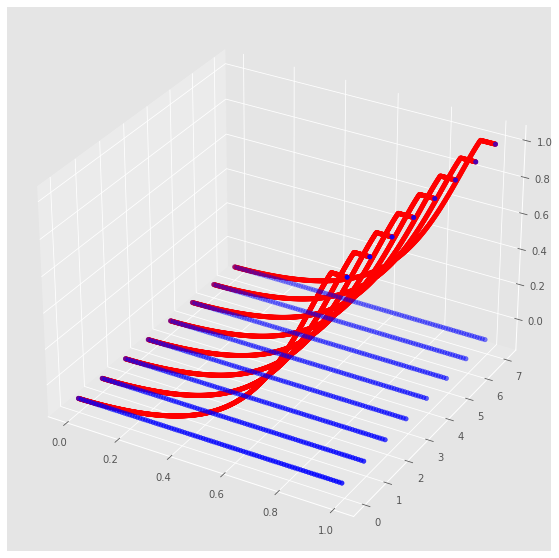

In [87]:
def hard_concrete(u, lr, lc, temp=0.66, gamma=-0.1, zeta=1.1):
    u = torch.tensor(u)
    s = torch.sigmoid((torch.log(u) - torch.log(1 - u) + lr.view(-1, 1)) / temp)
    # s = torch.sigmoid((torch.log(u) - torch.log(1 - u) + lc) / temp)
    # s = 0.5 * (s_r + s_c)
    s = s * (zeta - gamma) + gamma
    return torch.nn.functional.hardtanh(s)

loga = torch.load("analysis/loga_ar3")
i1, i2, i3, i4 = 13, 22, 64, 12
lr_ar = loga["loga_r_ar"].mean(0).mean(0)[ ::i3].detach().to("cpu")
lc_ar = loga["loga_c_ar"].mean(0).mean(0)[ i4].detach().to("cpu")
lr_es = loga["loga_r_es"].mean(0).mean(0)[ ::i3].detach().to("cpu")
lc_es = loga["loga_c_es"].mean(0).mean(0)[i4].detach().to("cpu")

print(lr_ar.shape, lc_ar.shape)
u = torch.range(0, 1, 0.001)
a = torch.range(0, lr_ar.shape[0] - 1, 1)
U, A = np.meshgrid(u, a)
s = hard_concrete(U, lr_ar, lc_ar)

plt.figure (figsize = (12, 10))
axes = plt.axes(projection='3d')
axes.scatter3D(U, A, s, color="r")

u = torch.range(0, 1, 0.01)
a = torch.range(0, lr_ar.shape[0] - 1, 1)
U, A = np.meshgrid(u,a)
s = hard_concrete(U, lr_es, lc_es)

# axes = plt.axes(projection='3d')
axes.scatter3D(U, A, s, color="b")

In [46]:
import torch
linear = torch.nn.Linear(3,4)
x = torch.rand(2,3)
y = linear(x)
l = ((y-1)**2).mean()
l.backward()

print(linear.weight)
for n, p in linear.named_parameters():
    grad = p.grad
    p.data = torch.abs(p.grad * p)
print(linear.weight)

Parameter containing:
tensor([[-0.5603,  0.1499,  0.1418],
        [ 0.2099,  0.3148, -0.3751],
        [-0.3899, -0.1143, -0.5455],
        [-0.2983, -0.5567, -0.1383]], requires_grad=True)
Parameter containing:
tensor([[0.2088, 0.0728, 0.0496],
        [0.0241, 0.0471, 0.0405],
        [0.1960, 0.0742, 0.2597],
        [0.2019, 0.4900, 0.0882]], requires_grad=True)
